<a href="https://colab.research.google.com/github/Mayshro/PCA_Project/blob/main/PCA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Load the train data in a dataframe
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.shape

(1460, 81)

MISSING VALUES IMPUTATION

In [ ]:
nulls = train.isnull().sum().sort_values(ascending=False)
nulls.head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

The attributes PoolQC,MiscFeature,Alley and Fence are having more than 60% of the values as 'nan'.so, its better to remove them.

In [ ]:
train = train.drop(['Id','PoolQC','MiscFeature','Alley','Fence'],axis = 1)

FireplaceQu

In [ ]:
train[['Fireplaces','FireplaceQu']].head(10)

,Fireplaces,FireplaceQu
0,0,NaN
1,1,TA
2,1,TA
3,1,Gd
4,1,TA
5,0,NaN
6,1,Gd
7,2,TA
8,2,TA
9,2,TA


In [ ]:
train['FireplaceQu'].isnull().sum()

690

In [ ]:
train['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [ ]:
#The attribute 'FireplaceQu' is having 690 null values.If we compare the columns 'FireplaceQu' and 'Fireplaces' the indexes which are having the zeros in the Fireplaces column are having the 'nan' values in FireplaceQu. It tells that the houses which are not having the Fireplaces are having nan values in FireplaceQu so, i will replace these nulls with "no Fireplace" i,e 'NF'

In [ ]:
train['FireplaceQu']=train['FireplaceQu'].fillna('NF')

LotFrontage

In [ ]:

train['LotFrontage'] =train['LotFrontage'].fillna(value=train['LotFrontage'].mean())


Attributes related to "GARAGE"

In [ ]:
train['GarageType'].isnull().sum()

81

In [ ]:
train['GarageType'].isnull().sum()

81

In [ ]:
train['GarageCond'].isnull().sum()

81

In [ ]:
train['GarageFinish'].isnull().sum()

81

In [ ]:
train['GarageYrBlt'].isnull().sum()

81

In [ ]:
train['GarageQual'].isnull().sum()

81

In [ ]:
train['GarageArea'].value_counts().head()

0      81
440    49
576    47
240    38
484    34
Name: GarageArea, dtype: int64


 Columns related to Garage are having the sama number of null values. so, there should be a relationship among them and if we look at the 'GarageArea' column it is having the 81 zeros which is equal to no: of 'nans' in these columns.Hence we can conclude that the houses without Garage Area are having 'nan' at all these columns. Replaced these nans with 'No GarageArea'----> 'NG'

In [ ]:
train['GarageType']=train['GarageType'].fillna('NG')
train['GarageCond']=train['GarageCond'].fillna('NG')
train['GarageFinish']=train['GarageFinish'].fillna('NG')
train['GarageYrBlt']=train['GarageYrBlt'].fillna('NG')
train['GarageQual']=train['GarageQual'].fillna('NG')

Bsmt

In [ ]:
train.BsmtExposure.isnull().sum()

38

In [ ]:
train.BsmtFinType2.isnull().sum()

38

In [ ]:
train.BsmtFinType1.isnull().sum()

37

In [ ]:
train.BsmtCond.isnull().sum()

37

In [ ]:
train.BsmtQual.isnull().sum()

37

In [ ]:
train.TotalBsmtSF.value_counts().head()

0       37
864     35
672     17
912     15
1040    14
Name: TotalBsmtSF, dtype: int64

In [ ]:
train['BsmtExposure']=train['BsmtExposure'].fillna('NB')
train['BsmtFinType2']=train['BsmtFinType2'].fillna('NB')
train['BsmtFinType1']=train['BsmtFinType1'].fillna('NB')
train['BsmtCond']=train['BsmtCond'].fillna('NB')
train['BsmtQual']=train['BsmtQual'].fillna('NB')

MasVnr

In [ ]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

In [ ]:
train['MasVnrType'] = train['MasVnrType'].fillna('none')

Electrical

In [ ]:
train.Electrical = train.Electrical.fillna('SBrkr')

In [ ]:
train.isnull().sum().sum()

0

OUTLIERS

In [ ]:
num_train = train._get_numeric_data()

In [ ]:
num_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_train.apply(lambda x: var_summary(x)).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
MSSubClass,1460.0,0.0,8.307000e+04,56.897260,50.000000,42.300571,1.789338e+03,20.0,20.00,20.00,20.0,20.00,50.000000,70.00,120.0,160.00,190.00,190.0
LotFrontage,1460.0,0.0,1.022729e+05,70.049958,70.049958,22.024023,4.850576e+02,21.0,21.00,35.95,49.0,60.00,70.049958,79.00,92.0,104.00,137.41,313.0
LotArea,1460.0,0.0,1.535457e+07,10516.828082,9478.500000,9981.264932,9.962565e+07,1300.0,1680.00,3311.70,5000.0,7553.50,9478.500000,11601.50,14381.7,17401.15,37567.64,215245.0
OverallQual,1460.0,0.0,8.905000e+03,6.099315,6.000000,1.382997,1.912679e+00,1.0,3.00,4.00,5.0,5.00,6.000000,7.00,8.0,8.00,10.00,10.0
OverallCond,1460.0,0.0,8.140000e+03,5.575342,5.000000,1.112799,1.238322e+00,1.0,3.00,4.00,5.0,5.00,5.000000,6.00,7.0,8.00,9.00,9.0
YearBuilt,1460.0,0.0,2.878051e+06,1971.267808,1973.000000,30.202904,9.122154e+02,1872.0,1899.18,1916.00,1924.9,1954.00,1973.000000,2000.00,2006.0,2007.00,2009.00,2010.0
YearRemodAdd,1460.0,0.0,2.897904e+06,1984.865753,1994.000000,20.645407,4.262328e+02,1950.0,1950.00,1950.00,1950.0,1967.00,1994.000000,2004.00,2006.0,2007.00,2009.00,2010.0
MasVnrArea,1460.0,0.0,1.513805e+05,103.685262,0.000000,180.569112,3.260520e+04,0.0,0.00,0.00,0.0,0.00,0.000000,164.25,335.0,456.00,791.28,1600.0
BsmtFinSF1,1460.0,0.0,6.477140e+05,443.639726,383.500000,456.098091,2.080255e+05,0.0,0.00,0.00,0.0,0.00,383.500000,712.25,1065.5,1274.00,1572.41,5644.0
BsmtFinSF2,1460.0,0.0,6.796200e+04,46.549315,0.000000,161.319273,2.602391e+04,0.0,0.00,0.00,0.0,0.00,0.000000,0.00,117.2,396.20,830.38,1474.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


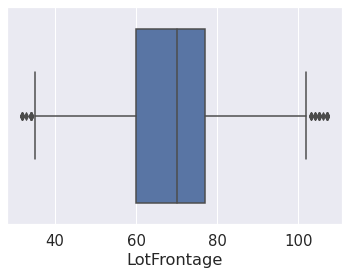

In [ ]:
sns.boxplot(num_train.LotFrontage)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


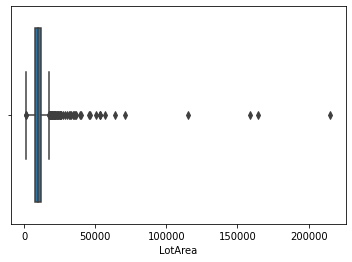

In [ ]:
sns.boxplot(num_train.LotArea)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


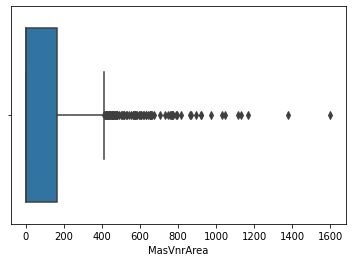

In [ ]:
sns.boxplot(train['MasVnrArea'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


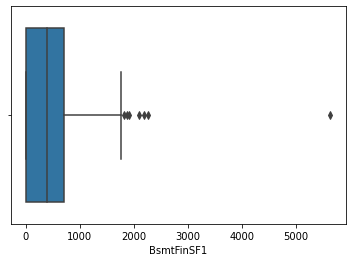

In [ ]:
sns.boxplot(train['BsmtFinSF1'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


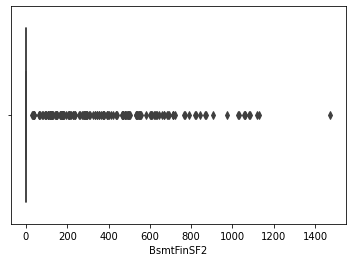

In [ ]:
sns.boxplot(train['BsmtFinSF2'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


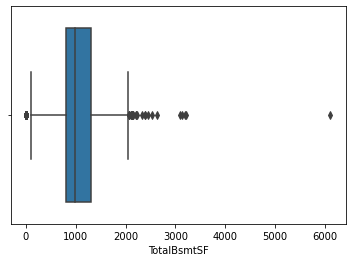

In [ ]:
sns.boxplot(train['TotalBsmtSF'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


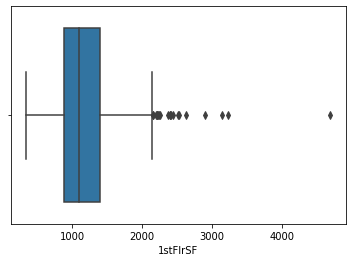

In [ ]:
sns.boxplot(train['1stFlrSF'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


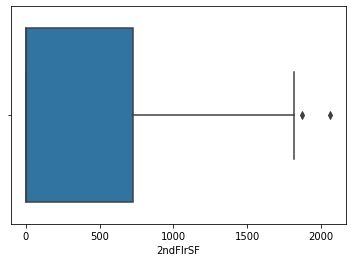

In [ ]:
sns.boxplot(train['2ndFlrSF'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


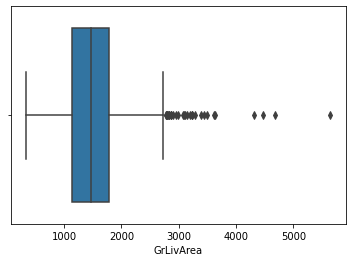

In [ ]:
sns.boxplot(train['GrLivArea'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


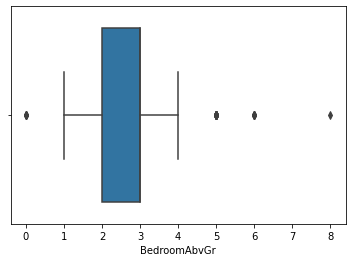

In [ ]:
sns.boxplot(train['BedroomAbvGr'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


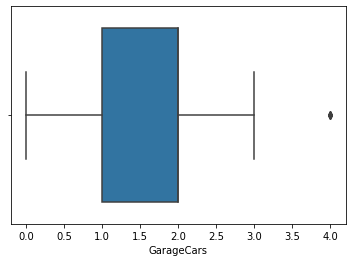

In [ ]:
sns.boxplot(train['GarageCars'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


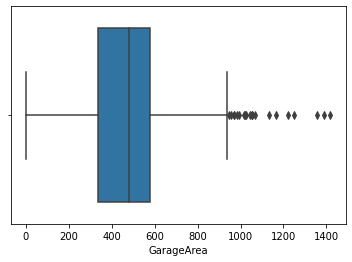

In [ ]:
sns.boxplot(train['GarageArea'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


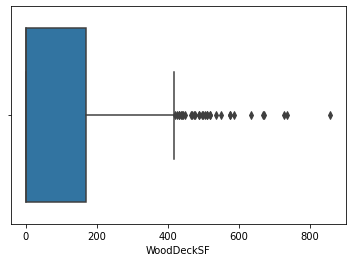

In [ ]:
sns.boxplot(train['WoodDeckSF'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


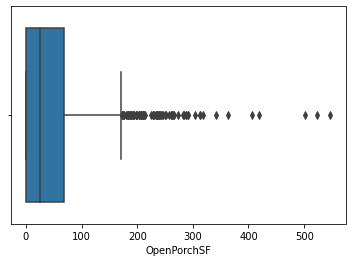

In [ ]:
sns.boxplot(train['OpenPorchSF'])

In [ ]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

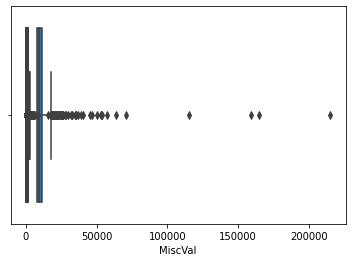

In [ ]:
columns  = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BedroomAbvGr','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
for i in columns:
  sns.boxplot(train[i])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


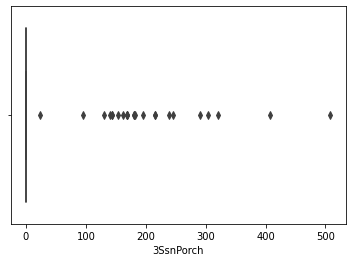

In [ ]:
sns.boxplot(train['3SsnPorch'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


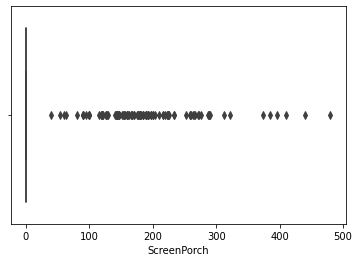

In [ ]:
sns.boxplot(train['ScreenPorch'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


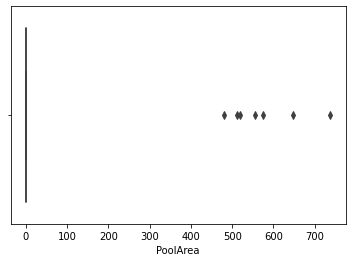

In [ ]:
sns.boxplot(train['PoolArea'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


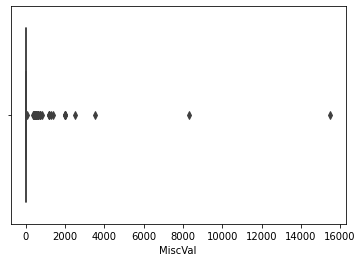

In [ ]:
sns.boxplot(train['MiscVal'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


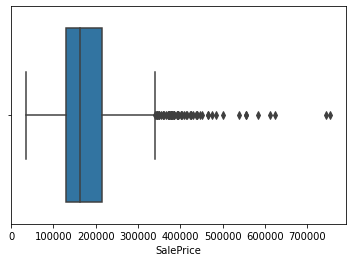

In [ ]:
sns.boxplot(train.SalePrice)

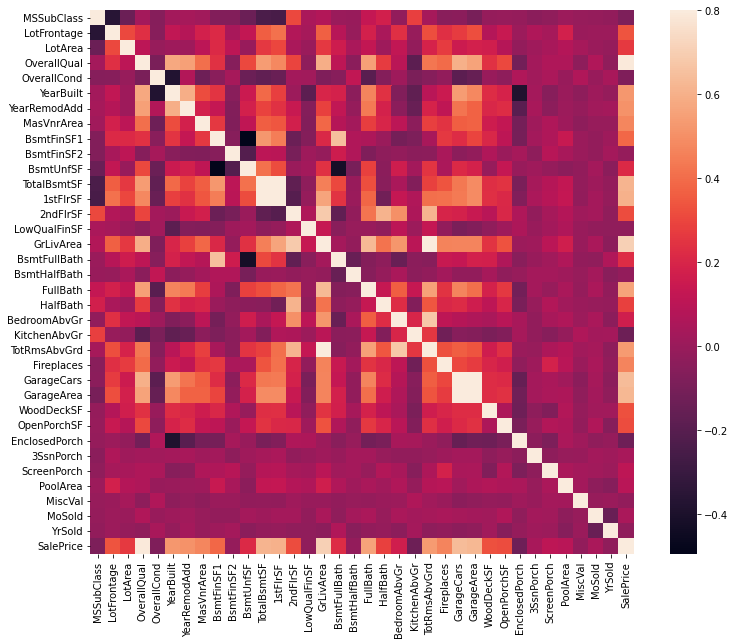

In [ ]:
num_corr=num_train .corr()
plt.subplots(figsize=(13,10))
sns.heatmap(num_corr,vmax =.8 ,square = True)

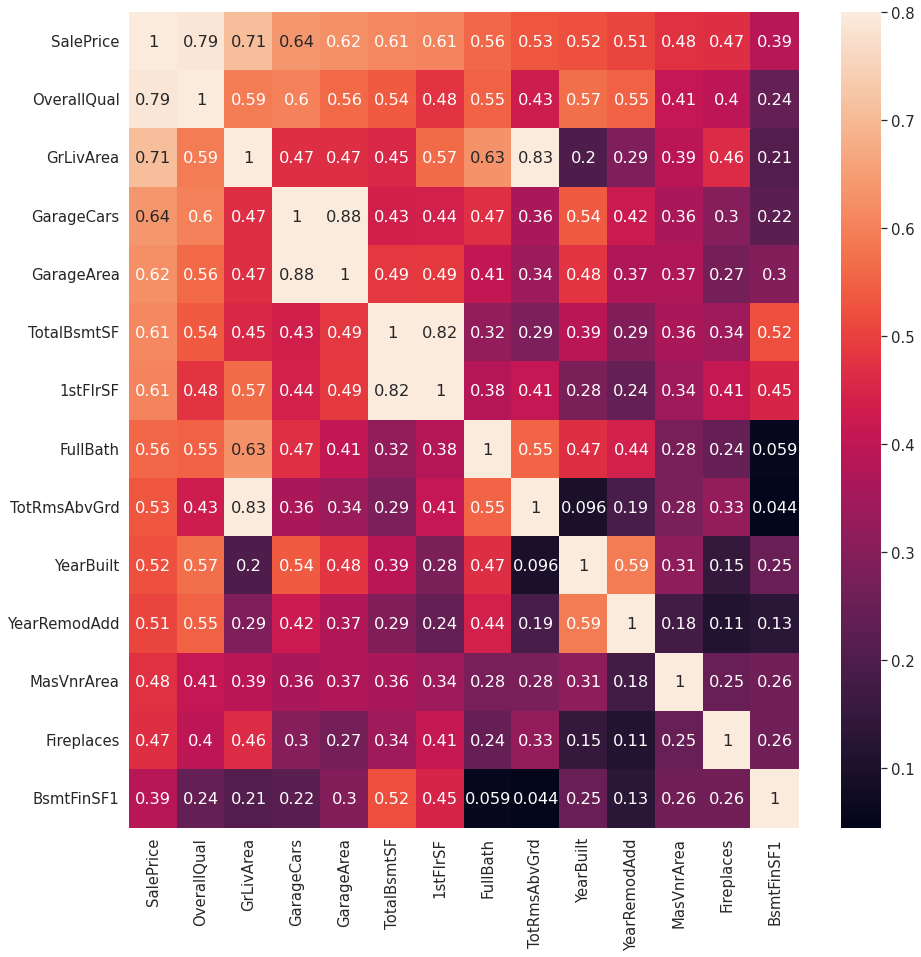

In [ ]:
k = 14
cols = num_corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(num_train[cols].values.T)
sns.set(font_scale=1.35)
f, ax = plt.subplots(figsize=(15,15))
hm=sns.heatmap(cm, annot = True,vmax =.8, yticklabels=cols.values, xticklabels = cols.values)

FEATURE SELECTION

Extracting new Features using PCA

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
train_d = pd.get_dummies(train)
train_d1 = train_d.drop(['SalePrice'],axis = 1)
y = train_d.SalePrice

In [ ]:
train_d.shape

(1460, 384)

Scaling

Before applying PCA we have to convert all the data into a single scale.I used Standard Scalar method to scale the data.

In [ ]:
scaler = StandardScaler()
scaler.fit(train_d1)                
t_train = scaler.transform(train_d1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test = train_test_split(
        t_train,
        y,
        test_size=0.20,
        random_state=123)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn import metrics

In [ ]:
radm_clf = RandomForestRegressor()
radm_clf.fit( X_train, Y_train )


RandomForestRegressor()

In [ ]:
radm_test_pred = pd.DataFrame( { 'actual':  Y_test,
                            'predicted': radm_clf.predict( X_test ) } )
metrics.r2_score( radm_test_pred.actual, radm_test_pred.predicted )

0.8802267119009901

In [ ]:
X_train.shape


(1168, 383)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_hp = PCA(30)
x_fit = pca_hp.fit_transform(t_train)

In [ ]:
X_trainp , X_testp, Y_train, Y_test = train_test_split(
        x_fit,
        y,
        test_size=0.20,
        random_state=123)

Bagging TECHNIQUES

Random Forest

In [ ]:
radm_clf = RandomForestRegressor()
radm_clf.fit( X_trainp, Y_train )


RandomForestRegressor()

In [ ]:
X_trainp.shape

(1168, 30)

In [ ]:
radm_test_pred = pd.DataFrame( { 'actual':  Y_test,
                            'predicted': radm_clf.predict( X_testp ) } )

In [ ]:
metrics.r2_score( radm_test_pred.actual, radm_test_pred.predicted )

0.8644742458005998